# Libraries Necessary 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
from scipy import stats
import scipy as sp
import math
import random
from scipy.optimize import curve_fit,minimize
from numpy.linalg import inv
from tqdm import tqdm as tqdm

In [2]:
# Import Relavant Modules 

from LifetimeAnalysis.LifetimeAnalysis import Run

# Summary of December 7th 2020 Production Run 


* ELOG Summary of Runs: https://maxwell.npl.washington.edu/elog/CENPA/Ne-19/17

**General Info for Runs:**

* Date: 11/24/2020
* Runs are named: runTEST12072020_#
* Channel and Trigger Configuration:


**General Info for this Document:**

* Plots all have 1 second bins. 
* Orange vertical lines represent the BEAM turning ON (22s prior to trigger from ch2). 
    * Note that this is different relative to tests done on 11242020. 

# Run Plots: 

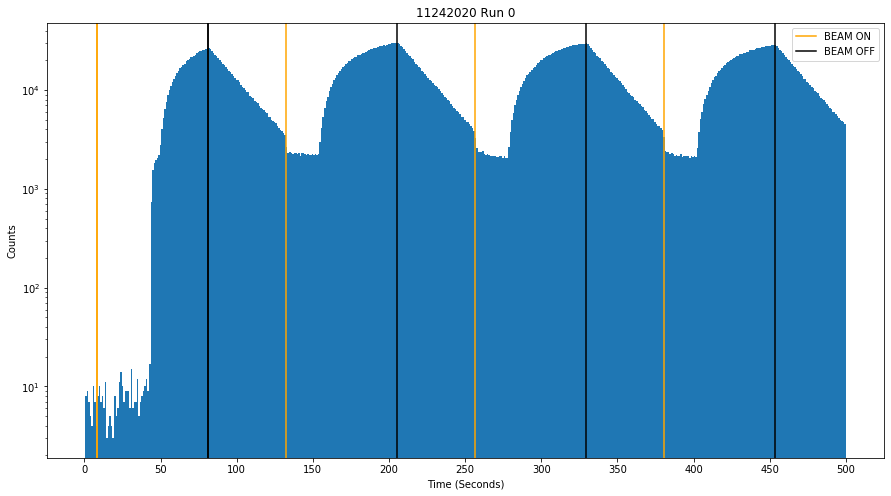

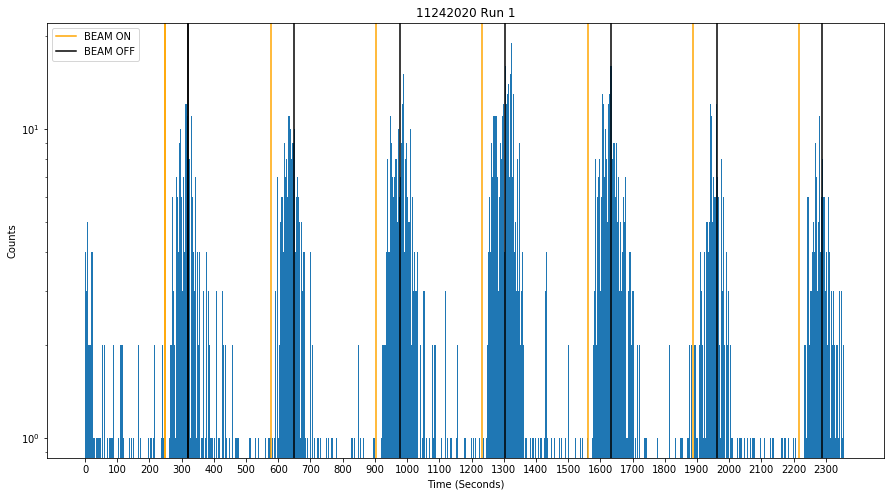

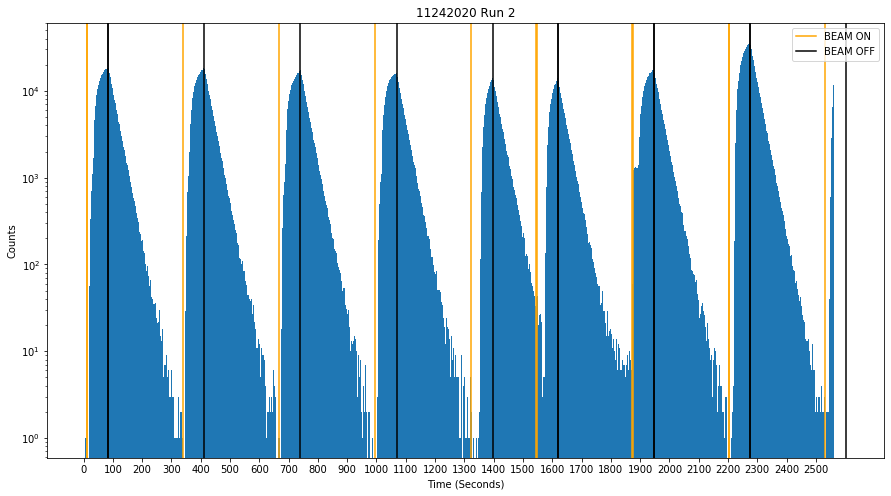

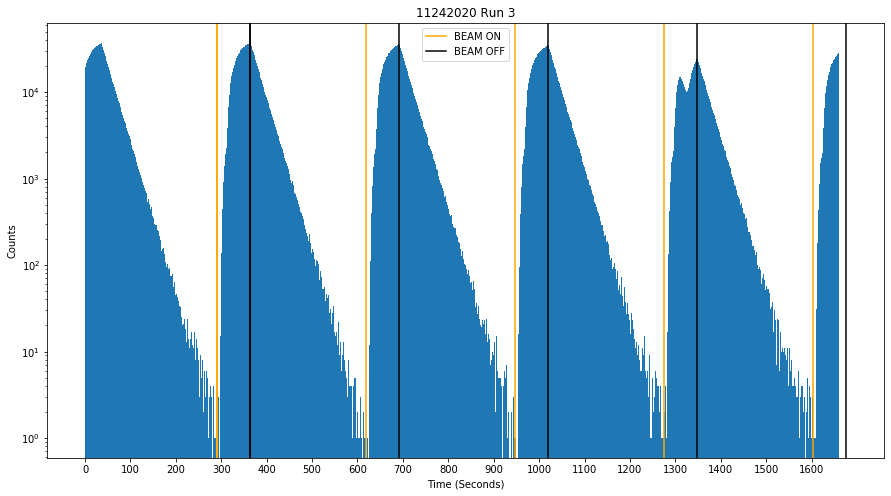

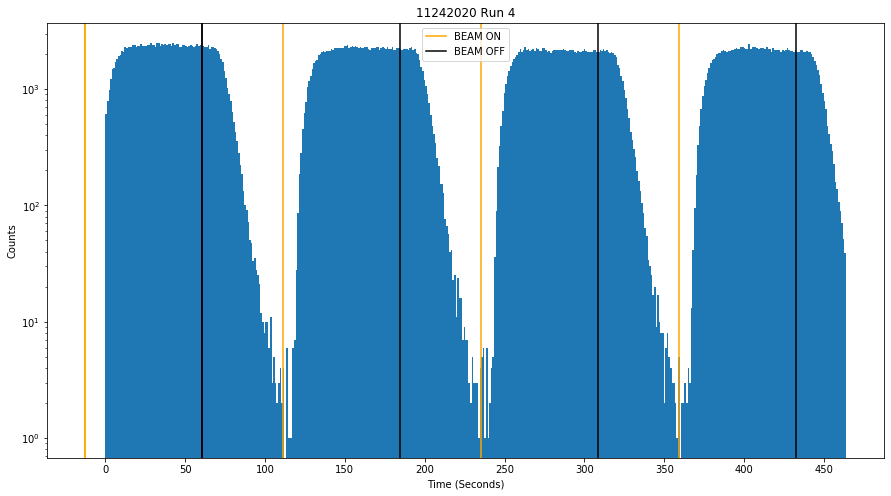

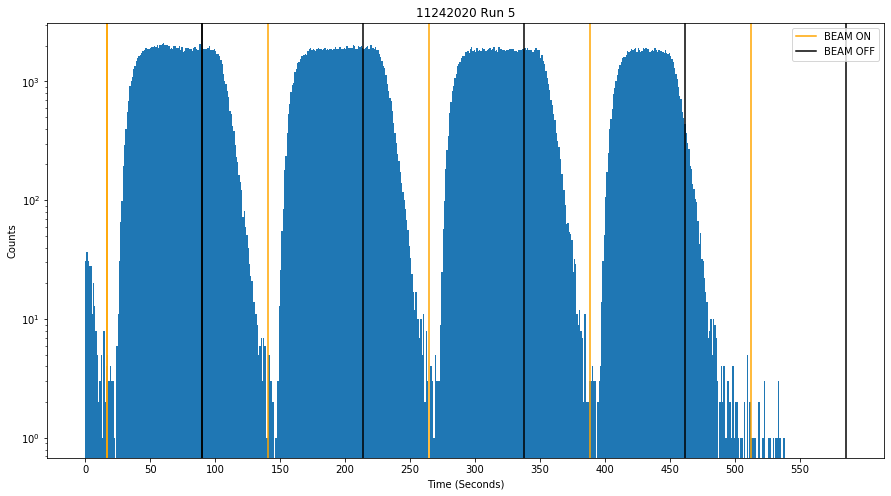

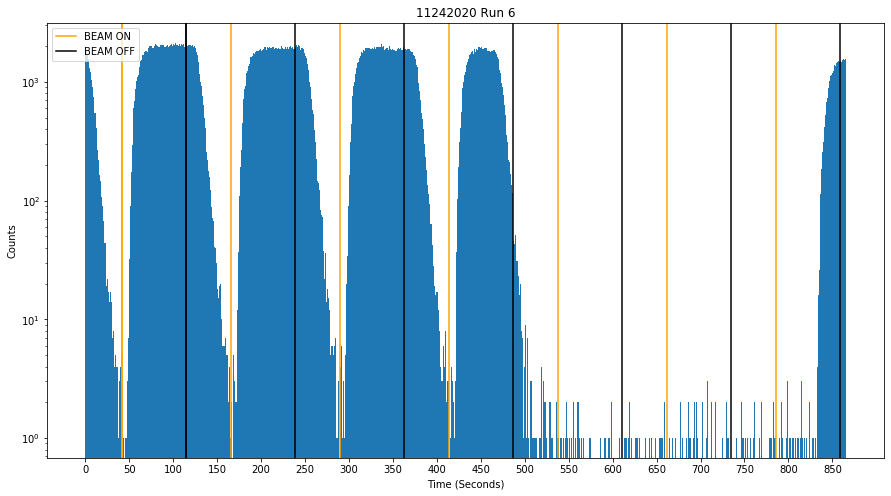

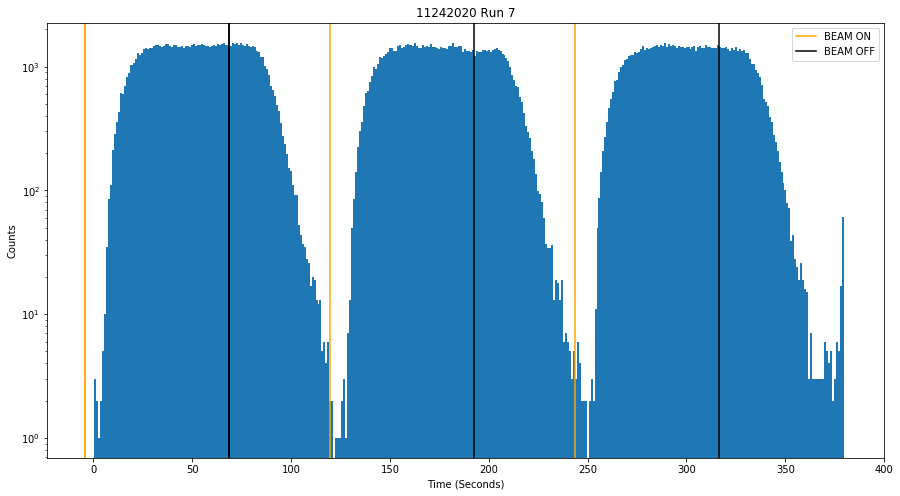

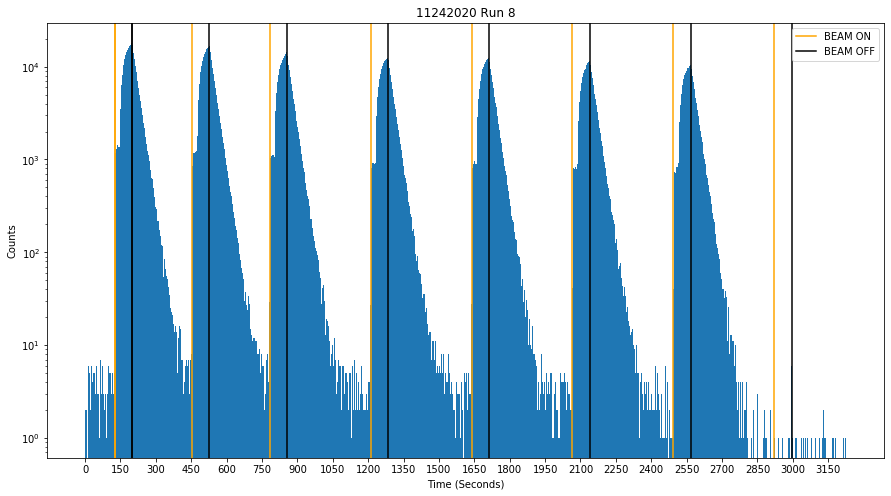

In [3]:
for i in range(9):
    
    RunNumber = Run(Date = '11242020', Run = i)
    
    BinNum = int(RunNumber.Data[0]['TIMETAG'].max()*10**-12) # Setting the number of bins = time of run in seconds.
    ax = plt.figure(figsize=(15,8))
    plt.tight_layout()
    plt.title('11242020 Run {}'.format(i))
    plt.ylabel('Counts')
    plt.xlabel('Time (Seconds)')
    plt.yscale('log')

    xcoords0 = (RunNumber.Data[2]['TIMETAG']*10**-12 -22) # Changing this to reflect BEAM ON. 
    plt.axvline(x=xcoords0[0],color='orange', label = 'BEAM ON') # Beam  Start
    plt.axvline(x=xcoords0[0] + 75, color = 'black', label = 'BEAM OFF') 
    for xc0 in xcoords0:
        plt.axvline(x=xc0,color='orange') # Beam  Start
        plt.axvline(x=xc0 + 75, color = 'black') # Cycle Stop
        
    y, x, _ = plt.hist(RunNumber.Data[0]['TIMETAG']*10**-12,bins=BinNum);

    tickfactor = 50
    tick_spacing = np.around((max(x)-min(x))/(40*tickfactor))*tickfactor+tickfactor

    plt.xticks(np.arange(np.around((min(x)/tickfactor))*tickfactor, np.around((max(x)/tickfactor))*tickfactor+1, tick_spacing))
    plt.legend()
#     plt.savefig('Plots/11242020_Run{}'.format(i))
    plt.show()
    
    

# Task 1:

Does the new cycle structure help us reach a constant and low background more quickly relative to when the accum valve closes? Does it also stay low at the end of the cycle (the beam turns on 10s before the end of the cycle). 

**Take-aways**

* With the previous cycle structure we needed to wait roughly 50s until the background was constant and low. 
* WHAT ABOUT NOW?

Alter the below code to analyze our background in real time today: 

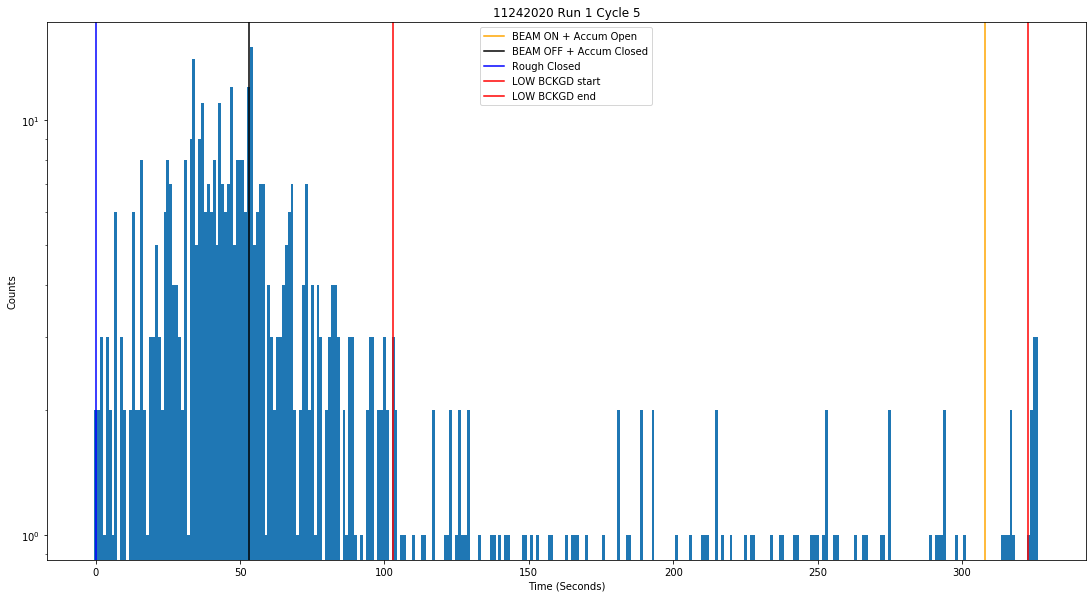

In [9]:
# How long until the background goes to a constant low rate? Use 11242020, Run = 1 

TimeInterval = (0,328)
Run_1 = Run(Date = '11242020', Run = 1)
Run_1.CycleSplit(TimeInterval)

df_Cumulative = pd.DataFrame().reindex_like(Run_1.Cycles[0][0])

BinNum = int(Run_1.Cycles[0][0]['TIMETAG'].max()*10**-12)


x = np.zeros((len(Run_1.Cycles[0]),BinNum+1))
y = np.zeros((len(Run_1.Cycles[0]),BinNum))


for i, df in enumerate(Run_1.Cycles[0]):
    
    y[i], x[i] = np.histogram(df['TIMETAG']*10**-12,bins=BinNum, range = [0,BinNum]);

    

ytot = np.sum(y, axis = 0)


# Plot summation of all cycles, or just one:

# plt.bar(x[0][:-1],ytot,width=1)
ax = plt.figure(figsize=(15,8))

plt.bar(x[0][:-1],y[5],width=1)


plt.tight_layout()
plt.title('11242020 Run 1 Cycle 5')
plt.ylabel('Counts')
plt.xlabel('Time (Seconds)')
plt.yscale('log')

plt.axvline(x=308, color = 'orange', label = 'BEAM ON + Accum Open') 
plt.axvline(x=53,color='black', label = 'BEAM OFF + Accum Closed') 
plt.axvline(x=0,color='blue', label = 'Rough Closed')
plt.axvline(x=103,color='red', label = 'LOW BCKGD start') 
plt.axvline(x=323,color='red', label = 'LOW BCKGD end')
 

plt.legend()
plt.show()